In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")

In [280]:
df = pd.read_csv("./archive/creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [281]:
## let's normalize our dataset
## we start with checking null values
## data has no zero value
df.isnull().sum().max()

0

In [282]:
## we have 28 feature + Amount + Class + Time columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [283]:
print("number of no Fraud Credit Cards: " + str(df["Class"].value_counts()[0]))
print("number of no Fraud Credit Cards: " + str(df["Class"].value_counts()[1]))
print(str(round(df["Class"].value_counts()[0]/ len(df) * 100, 3)) + "% of Credit Cards are Safe")
print(str(round(df["Class"].value_counts()[1]/ len(df) * 100, 3)) + "% of Credit Cards are Fraud")
## as we see here, our dataset is imbalanced and if we take not an appropriate sample then our model will predict wrong.
## in next steps we will use diagrams to check and compare our features in fraud and non-fraud cards

number of no Fraud Credit Cards: 284315
number of no Fraud Credit Cards: 492
99.827% of Credit Cards are Safe
0.173% of Credit Cards are Fraud


Text(0.5, 1.0, 'Class Distributions\n 1 => Fraud || 0 => no Fraud')

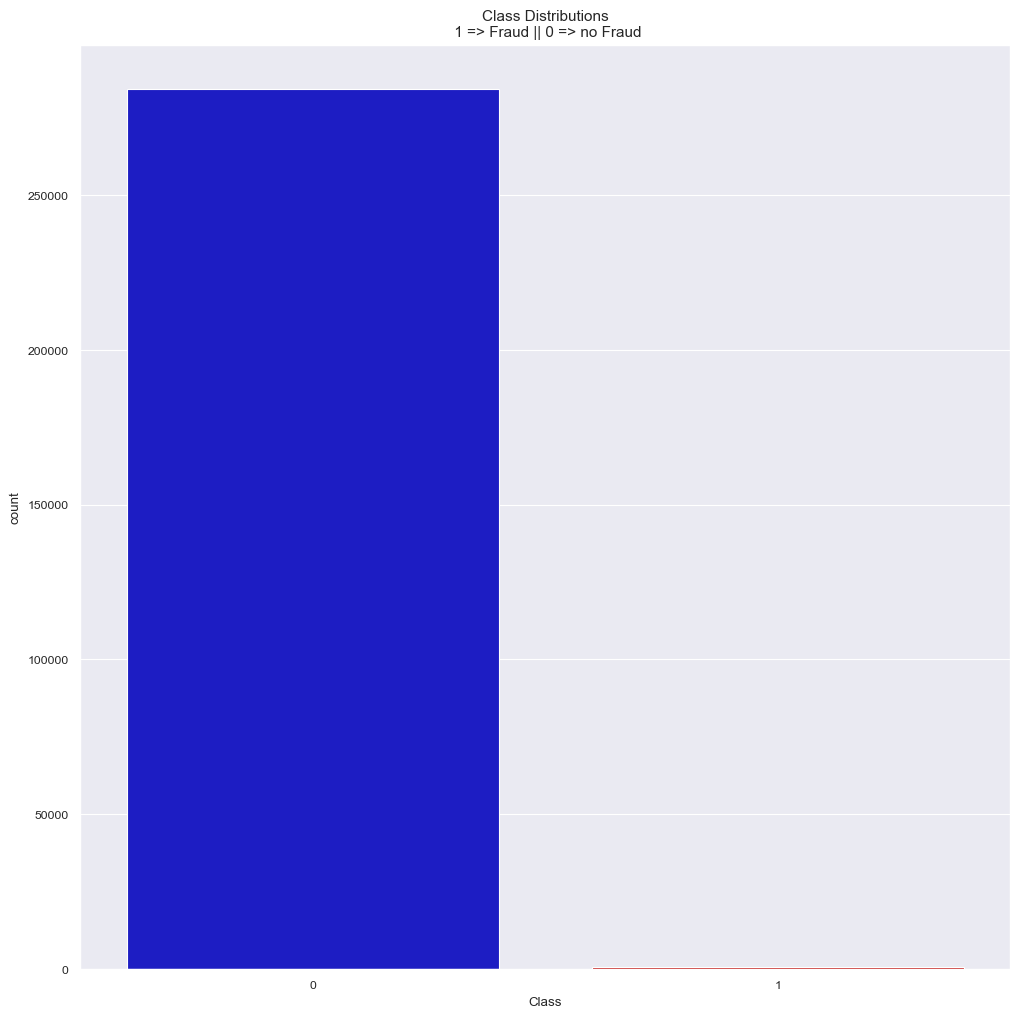

In [284]:
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(12, 12))
sns.set_context("paper", rc={"figure.figsize": (12, 12)})
sns.countplot(data=df, palette=colors, x="Class")
plt.title("Class Distributions\n 1 => Fraud || 0 => no Fraud", fontsize=11)

(0.0, 172792.0)

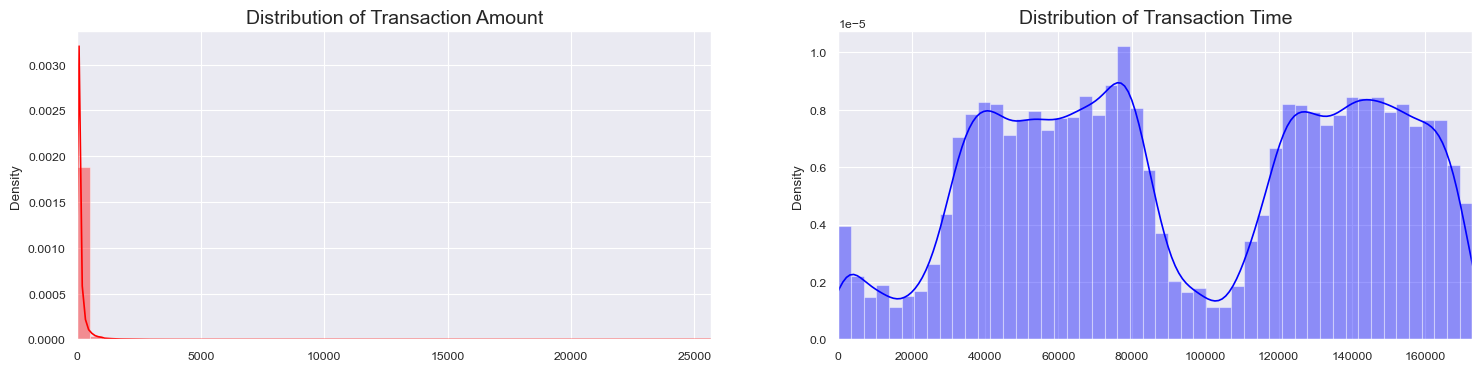

In [285]:
## we will take a sample of our dataset which is combined equally of Fraud and no Fraud cases.
## because our dataset is imbalanced, taking bad samples leads to overfitting and wrong-correlataions problems.
## overfitting problem: if our sample has many no fraud cases then our model cannot detect patterns in fraud cases
## but first, we will scale our dataset's time and amount columns as other columns
## many ML algorithms are sensitive to scale of data because they use Euclidean distance between two data points in their computations/derivations and not scaled data affect our algorithm more than other features
## Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm. In particular, several ML techniques, such as neural networks, require that the input data to be normalized for it to work well.

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



In [286]:
from sklearn.preprocessing import StandardScaler, RobustScaler
##Both standard and robust scalers transform inputs to comparable scales. The difference lies in how they scale raw input values.
##Standard scaling uses mean and standard deviation. Robust scaling uses median and interquartile range (IQR) instead.
##robust scaling uses median and IQR makes it resistant to outliers

std_scaler = StandardScaler()
rob_scaler = RobustScaler()
## first we use robust scaler to scale amount and time columns between -1 and 1
## than we remove no scaled time and amount columns
# than we replace them with new ones
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [287]:
##taking sample:
##There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.
##Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.
##Both approaches can be repeated until the desired class distribution is achieved in the training dataset, such as an equal split across the classes.
##They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.
##The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.
## Random under_sampling:
## this method consist of removing data in order to have more balanced dataset and thus to avoid overfitting
## but this method removes large amount data which leads to data loss problem than it affects our model's accuracy
## we first check how imbalance is our data than we bring a 50/50 ratio of Fraud and no Fraud data.
## to be more accurate, we shuffle our dataframe first.

df = df.sample(frac=1)
fraud_df = df.loc[df["Class"] == 1]
no_fraud_df = df.loc[df["Class"] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, no_fraud_df])
##shuffle dataset once more
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
9988,-0.285754,-0.818889,1.214663,0.637900,0.156007,1.329216,0.216616,-0.842642,0.447672,-0.368069,...,-0.184957,-0.088491,0.126292,-0.074118,0.384059,0.742769,-0.328457,-0.012039,0.006305,0
208651,0.243834,0.617007,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,...,0.357369,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,1
246731,0.334521,0.806071,2.079148,-0.653380,-1.463517,-0.263827,-0.265381,-0.739751,-0.089697,-0.262051,...,-0.537349,-0.459769,-0.831369,0.203357,-0.360711,-0.154850,0.181335,-0.057619,-0.066351,0
150715,-0.148117,0.108942,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,...,0.208879,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,1
150665,2.622092,0.107661,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,...,-0.081220,1.909032,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,1


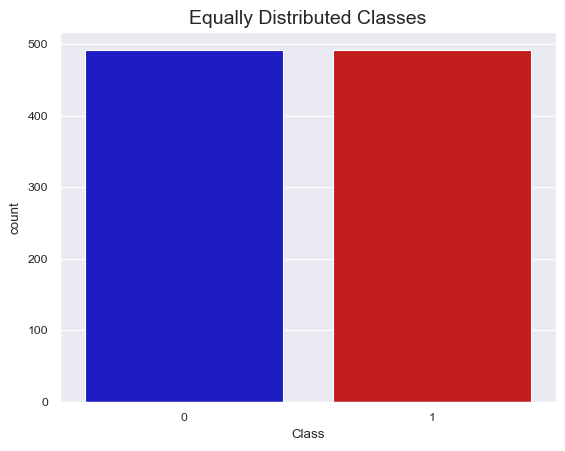

In [288]:
## as you can see, new_df Under_Smaple is equally distributed between two Classes

new_df['Class'].value_counts()/len(new_df)
sns.countplot(data=new_df,palette=colors, x="Class")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

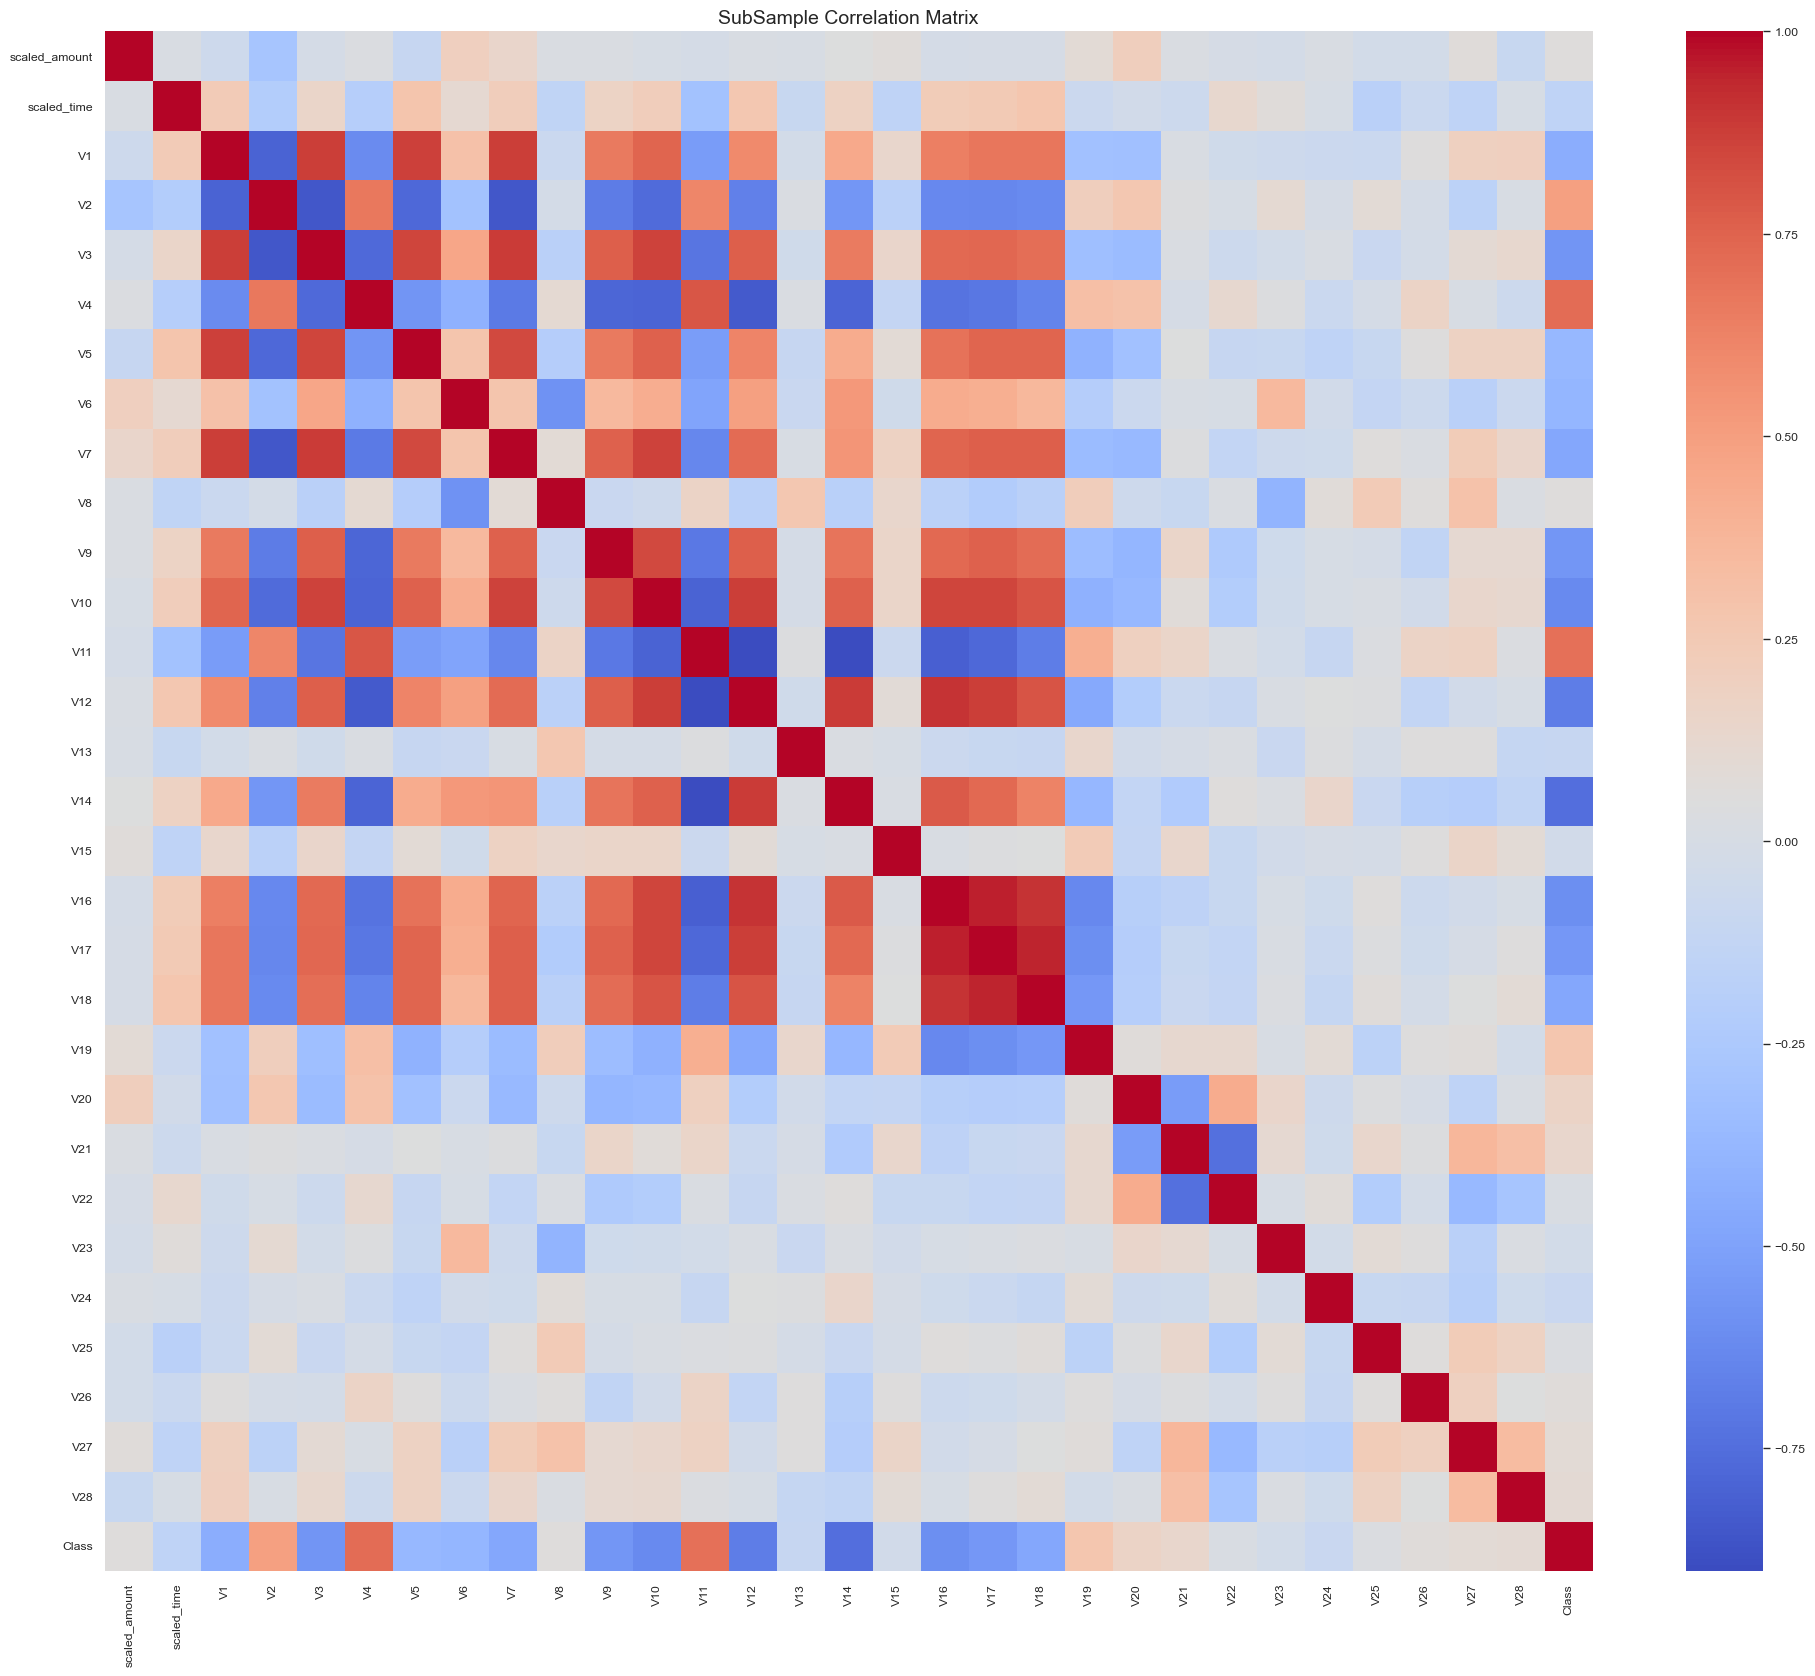

In [289]:
## Correlation Matrix is a tool that show relation between features.
## it can help us to understand relationship between features and Fraud Cards
## since our original dataframe is highly imbalanced, therefore we use our sample to analyze.
f, ax = plt.subplots(1, 1, figsize=(24,20))

sub_smaple_corr = new_df.corr()
sns.heatmap(sub_smaple_corr, cmap='coolwarm', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

## as we see below, V2, V4, V11, V19 and V20 are positively Related, the higher these values are, the more chance to results end up Fraud
## V10, V12, V14, V16, V17, V18 are negatively related.

In [290]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD

X = df.drop('Class', axis=1)
y = df['Class']

t0 = time.time()
kmeans_to_check = KMeans(n_clusters=2, random_state=42).fit(X.values)
t1 = time.time()
kmeans = KMeans(n_clusters=2, random_state=42).fit_transform(X.values)
print("Kmeans took {:.2} s".format(t1 - t0))

t0 = time.time()
X_reduced_pca_to_check = PCA(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
print("PCA took {:.2} s".format(t1 - t0))

t0 = time.time()
X_reduced_svd_to_check = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit(X.values)
t1 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
print("Truncated SVD took {:.2} s".format(t1 - t0))


Kmeans took 1.7 s
PCA took 0.69 s
Truncated SVD took 0.52 s


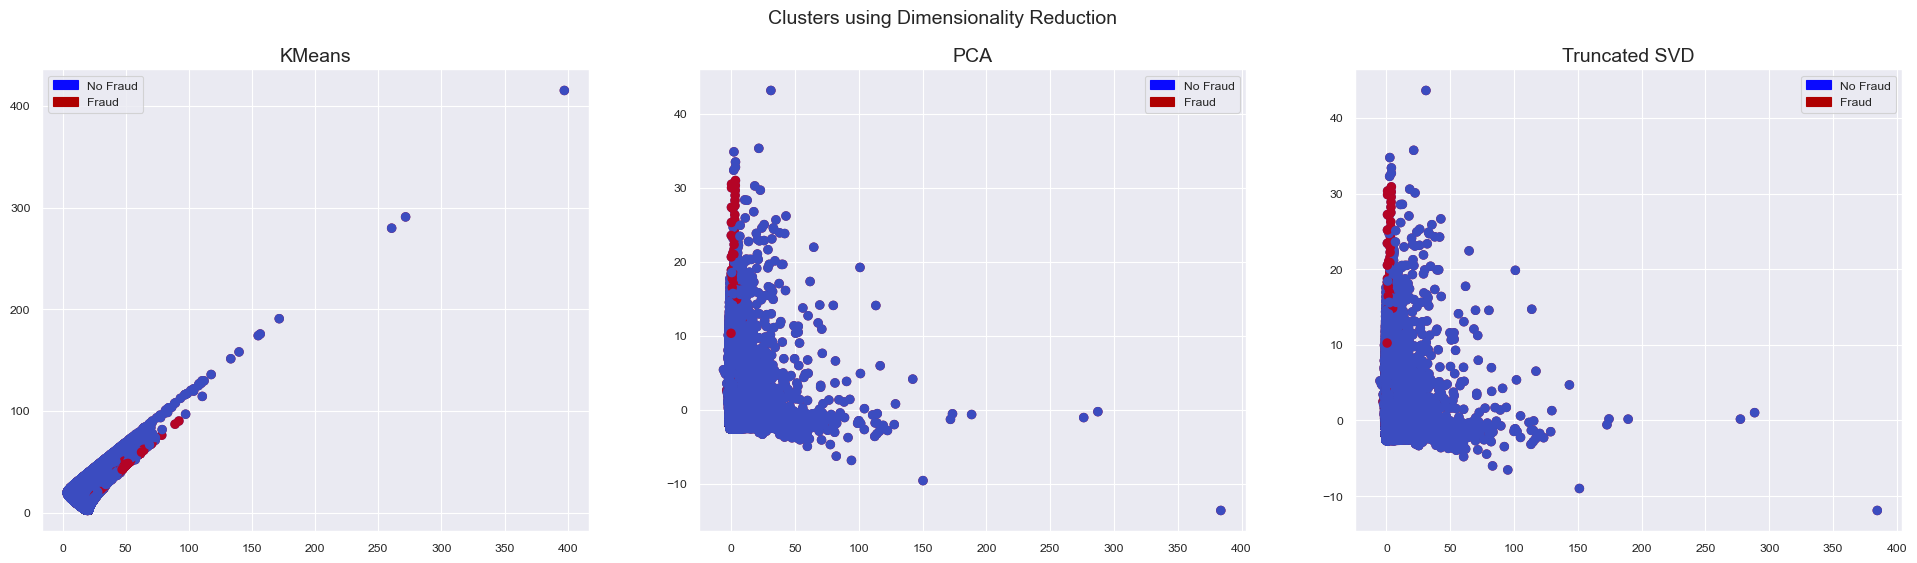

In [291]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax1.scatter(kmeans[:,0], kmeans[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(kmeans[:,0], kmeans[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('KMeans', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [292]:
count_of_class_0_in_cluster_1 = len(y[kmeans_to_check.labels_==0][y[kmeans_to_check.labels_==0]==0])
count_of_class_1_in_cluster_1 = len(y[kmeans_to_check.labels_==0][y[kmeans_to_check.labels_==0]==1])

count_of_class_0_in_cluster_2 = len(y[kmeans_to_check.labels_==1][y[kmeans_to_check.labels_==1]==0])
count_of_class_1_in_cluster_2 = len(y[kmeans_to_check.labels_==1][y[kmeans_to_check.labels_==1]==1])
print(count_of_class_0_in_cluster_1)
print(count_of_class_1_in_cluster_1)
print(count_of_class_0_in_cluster_2)
print(count_of_class_1_in_cluster_2)
## as we see here cluster-1 stands for no Fraud cluster
## but accuracy is poor since we have 470 of 492 fraud card in no-Fraud cluster

5483
22
278832
470


In [293]:
## Now let's implement Classifiers
## we'll use logistic Regression as a classifier because it has more accuracy than other classifiers
## also we use UnderSampling
X = df.drop('Class', axis=1)
y = df['Class']

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [302]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85304
           1       0.03      0.91      0.06       139

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.96      0.98     85443



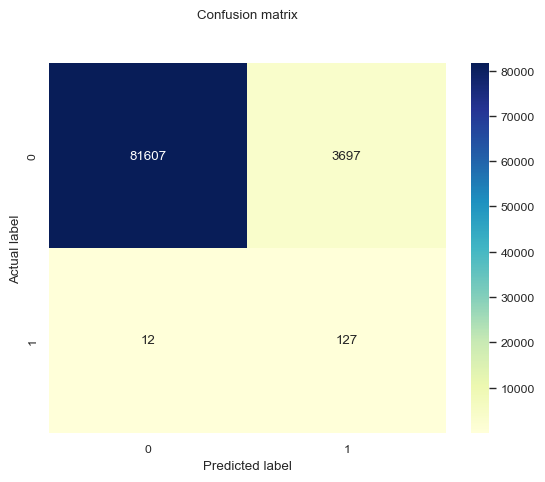

In [308]:
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler


rus = RandomUnderSampler(random_state=42)
#ros = RandomOverSampler(random_state=42)
log_model = LogisticRegression(random_state=42)
undersample_X_train , undersample_y_train = rus.fit_resample(X_train, y_train)
#oversample_X_train , oversample_y_train = ros.fit_resample(X_train, y_train)
log_model.fit(undersample_X_train, undersample_y_train)
#log_model.fit(oversample_X_train, oversample_y_train)
y_pred = log_model.predict(X_test)


cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print('Logistic Regression:')
print(classification_report(y_test, y_pred))


In [310]:

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, y_pred))


Logistic Regression:  0.93516497408844


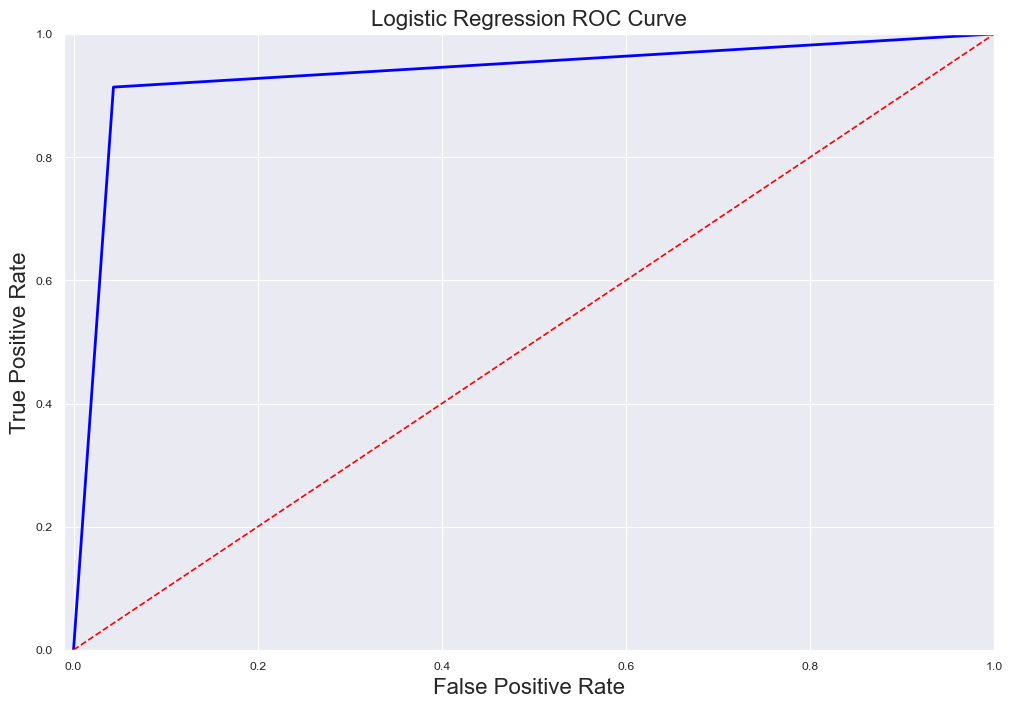

In [309]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred)
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()